In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [ ]:
df = pd.read_csv("uber.csv")

In [ ]:
df.head()
df.info() #To get the required information of the dataset
df.columns #TO get number of columns in the dataset
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required
df.head()
df.shape #To get the total (Rows,Columns)
df.dtypes #To get the type of each column
df.info()
df.describe() #To get statistics of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17848 entries, 0 to 17847
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17848 non-null  int64  
 1   key                17848 non-null  object 
 2   fare_amount        17847 non-null  float64
 3   pickup_datetime    17847 non-null  object 
 4   pickup_longitude   17847 non-null  float64
 5   pickup_latitude    17847 non-null  float64
 6   dropoff_longitude  17847 non-null  float64
 7   dropoff_latitude   17847 non-null  float64
 8   passenger_count    17847 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17848 entries, 0 to 17847
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        17847 non-null  float64
 1   pickup_datetime    17847 non-null  object 
 2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000
mean,11.417429,-72.595005,39.951854,-72.580938,39.952298,1.672830
std,10.173691,11.458450,6.095753,10.197475,6.096021,1.295875
min,2.500000,-748.016667,-74.009697,-75.350437,-74.008745,0.000000
25%,6.000000,-73.992000,40.734977,-73.991591,40.733933,1.000000
50%,8.500000,-73.981823,40.752377,-73.980073,40.752884,1.000000
75%,12.500000,-73.967328,40.767152,-73.963307,40.768318,2.000000
max,350.000000,40.770667,41.366138,40.828377,41.366138,6.000000


In [ ]:
df.isnull().sum()

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [ ]:
df.isnull().sum()

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [ ]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
 day= df.pickup_datetime.dt.day,
 month = df.pickup_datetime.dt.month,
 year = df.pickup_datetime.dt.year,
 dayofweek = df.pickup_datetime.dt.dayofweek)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [ ]:
df = df.drop('pickup_datetime',axis=1)

In [ ]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                 float64
day                  float64
month                float64
year                 float64
dayofweek            float64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

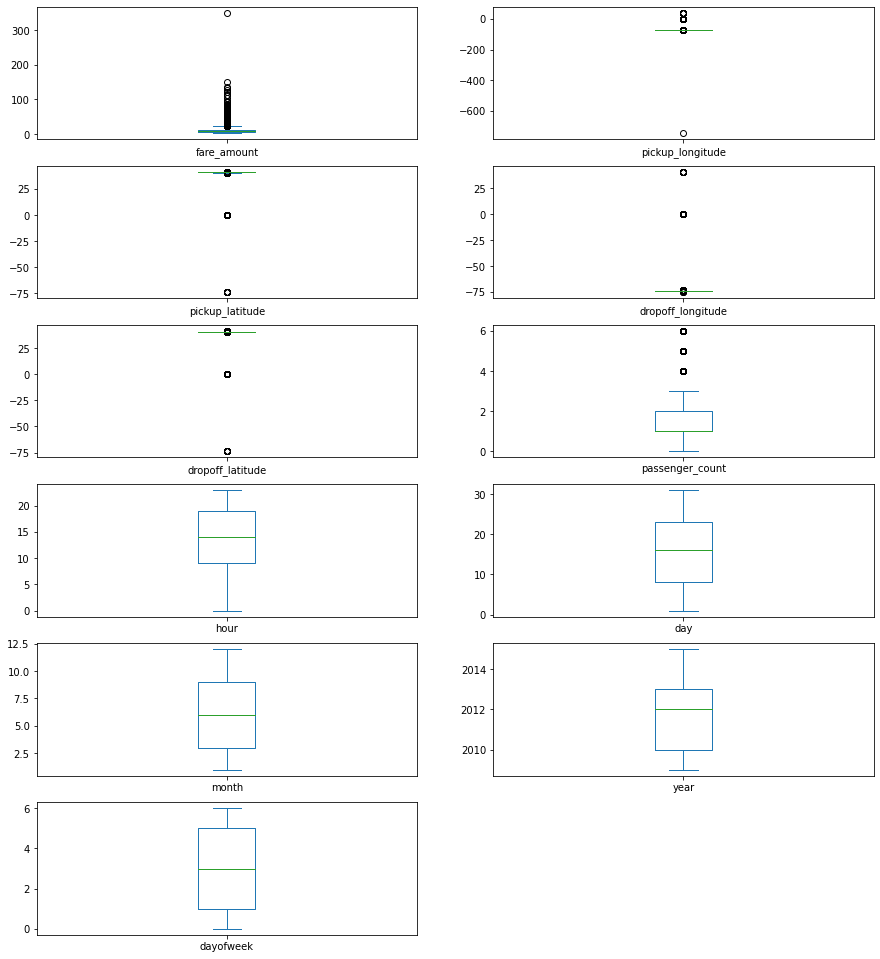

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [ ]:
def remove_outlier(df1 , col):
 Q1 = df1[col].quantile(0.25)
 Q3 = df1[col].quantile(0.75)
 IQR = Q3 - Q1
 lower_whisker = Q1-1.5*IQR
 upper_whisker = Q3+1.5*IQR
 df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
 return df1

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

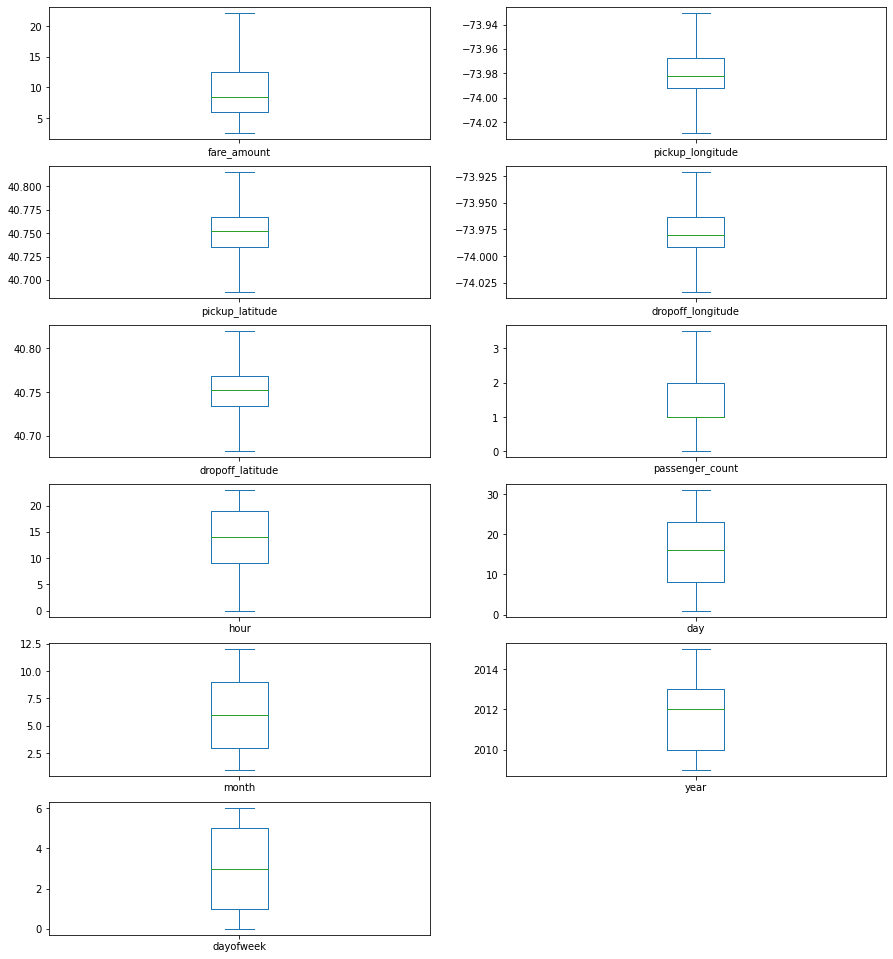

In [ ]:
def treat_outliers_all(df1 , col_list):
 for c in col_list:
     df1 = remove_outlier(df , c)
 return df1
df = treat_outliers_all(df , df.iloc[: , 0::])
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #

In [ ]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import haversine as hs 

In [ ]:
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
     long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
     loc1=(lati1,long1)
     loc2=(lati2,long2)
     c = hs.haversine(loc1,loc2)
     travel_dist.append(c)
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head() 

[1.6833250775073447, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 4.076311861784062, 0.0, 9.564129520799675, 0.9330982763510489, 2.3327142314177545, 4.889423641655177, 2.2508607308770285, 0.9330982763510489, 0.3022521108558365, 3.5812557740132496, 1.3099517093917648, 1.716279792276335, 0.7299665570466272, 2.515953547298386, 1.790321726187665, 1.0347050399795192, 2.4902472008677727, 0.9594701844599927, 1.2613897673437817, 1.7517650017211177, 6.1932445014761095, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.4295172964395384, 2.233699311547041, 11.051638305636851, 1.8950491608266506, 1.9049353402365328, 3.1821178242889583, 4.440108328802625, 2.9230236888626995, 1.200213842045202, 2.635790807404098, 2.253613903554444, 9.250183815732733, 4.826533532872274, 1.2502926870845612, 0.7984742276755328, 0.840396152683202, 0.38519924001701444, 2.434346176233359, 3.127909533264099, 3.7346507724526368, 0.0, 4.504360509008704, 1.5579008497303448, 4.923160610490316, 7.68315806

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,-73.930320,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.076312


In [ ]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (17847, 12)


In [ ]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
 (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
 (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
 (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
 ]

In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,-73.930320,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.076312


In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,-73.930320,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.076312


In [ ]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

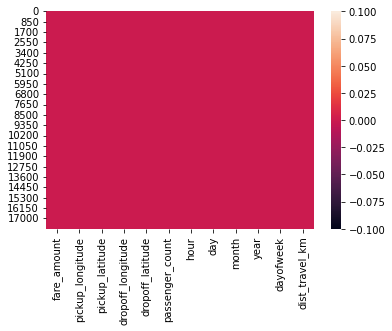

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
corr = df.corr() #Function to find the correlation
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.153368,-0.108776,0.223489,-0.124533,0.014469,-0.006498,0.005518,0.033214,0.150849,0.021153,0.785908
pickup_longitude,0.153368,1.000000,0.274753,0.426871,0.092328,-0.009624,0.012530,-0.004811,0.001031,0.007507,-0.038864,0.049876
pickup_latitude,-0.108776,0.274753,1.000000,0.059080,0.521082,-0.013146,0.031483,-0.002737,0.002606,-0.004637,-0.039530,-0.070924
dropoff_longitude,0.223489,0.426871,0.059080,1.000000,0.262108,-0.010827,-0.059589,0.001375,0.003832,0.014170,-0.010752,0.163914
dropoff_latitude,-0.124533,0.092328,0.521082,0.262108,1.000000,-0.011127,0.014533,-0.000562,0.001088,0.001864,-0.029052,-0.050888
passenger_count,0.014469,-0.009624,-0.013146,-0.010827,-0.011127,1.000000,0.020008,0.010531,0.012914,-0.009657,0.041330,0.019215
hour,-0.006498,0.012530,0.031483,-0.059589,0.014533,0.020008,1.000000,0.000564,0.001271,0.001018,-0.093866,-0.020323
day,0.005518,-0.004811,-0.002737,0.001375,-0.000562,0.010531,0.000564,1.000000,-0.022054,-0.014385,-0.003451,0.003407
month,0.033214,0.001031,0.002606,0.003832,0.001088,0.012914,0.001271,-0.022054,1.000000,-0.125294,-0.004293,0.015202
year,0.150849,0.007507,-0.004637,0.014170,0.001864,-0.009657,0.001018,-0.014385,-0.125294,1.000000,0.001628,0.029788


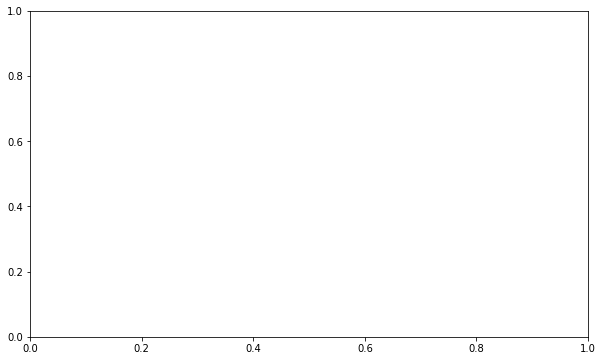

In [ ]:
fig,axis = pl.subplots(figsize = (10,6))

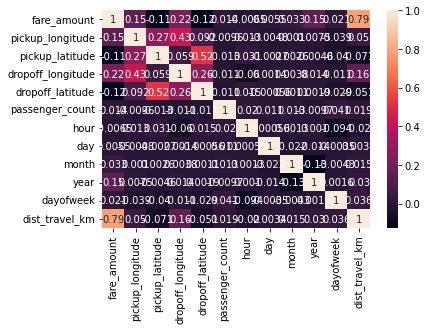

In [ ]:
sns.heatmap(df.corr(),annot = True) 

In [ ]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.coef_ #To find the linear coeeficient
regression.intercept_ #To find the linear intercept
prediction = regression.predict(X_test) #To predict the target values
print(prediction)
y_test

[ 7.77514046  8.18212867 14.34698029 ... 12.4349973   5.89411681
 14.51112317]


3890      7.3
17194     8.9
3326     11.0
15543    11.7
1031      8.1
         ... 
13158     4.9
17670     7.3
1599     11.0
16965     4.5
13022    16.0
Name: fare_amount, Length: 5890, dtype: float64

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,prediction)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
MSE
RMSE = np.sqrt(MSE)
RMSE

3.1762118358497964

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

array([ 7.428 ,  8.192 , 13.41  , ..., 15.855 ,  4.87  , 15.3365])

In [ ]:
R2_Random = r2_score(y_test,y_pred)
R2_Random

0.7657559143188848

In [ ]:
MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random

6.879076258114177

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)
RMSE_Random

2.622799317163663